In [310]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [311]:
# Lista de dicionários para armazenar as métricas
metricas = []

for pSize in range(1, 51):
    
    name_image = 'Kodak01'
    valor_psnr = random.uniform(0, 50)  # Substitua obter_valor_psnr(pSize) pelo código para obter o valor do PSNR para pSize
    valor_ssim = random.uniform(0, 40)  # Substitua obter_valor_ssim(pSize) pelo código para obter o valor do SSIM para pSize
    valor_vif = random.uniform(0, 100)    # Substitua obter_valor_vif(pSize) pelo código para obter o valor do VIF para pSize

    metrica = {'pSize': pSize, 'psnr': valor_psnr, 'ssim': valor_ssim, 'vif': valor_vif}
    metricas.append(metrica)
        
    # Gravar os dados no arquivo de texto
    with open(f'./metricas_txts/metricas_fake_{name_image}.txt', 'w') as arquivo:
        for metrica in metricas:
            linha = f"pSize: {metrica['pSize']}, PSNR: {metrica['psnr']}, SSIM: {metrica['ssim']}, VIF: {metrica['vif']}\n"
            arquivo.write(linha)


In [312]:
# Criação do DataFrame
df = pd.DataFrame(metricas)


In [313]:
df.head(10)

,pSize,psnr,ssim,vif
0,1,22.247619,35.265040,74.013296
1,2,44.034469,26.632693,27.992135
2,3,35.173009,38.455036,89.694019
3,4,13.612150,37.119148,20.293240
4,5,8.319738,32.422416,71.607176
5,6,22.991648,33.073601,11.791939
6,7,16.170881,17.267368,15.631534
7,8,30.330631,20.711754,54.241323
8,9,19.258517,31.040139,75.917035
9,10,49.148584,2.116614,56.904778


In [314]:
# inverter linhas e colunas
new_df = df.T
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
pSize,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,41.000000,42.000000,43.000000,44.000000,45.000000,46.000000,47.000000,48.000000,49.000000,50.000000
psnr,22.247619,44.034469,35.173009,13.612150,8.319738,22.991648,16.170881,30.330631,19.258517,49.148584,...,40.633499,24.823866,1.802918,15.190212,35.700947,31.222434,3.508359,25.430342,43.858282,28.115246
ssim,35.265040,26.632693,38.455036,37.119148,32.422416,33.073601,17.267368,20.711754,31.040139,2.116614,...,26.273749,13.719130,8.571924,12.221158,7.440979,37.192738,4.616049,22.714872,1.180360,17.548025
vif,74.013296,27.992135,89.694019,20.293240,71.607176,11.791939,15.631534,54.241323,75.917035,56.904778,...,8.055729,69.520398,21.358984,98.832522,35.938158,7.808232,44.039050,0.534489,27.841230,22.185954


In [315]:
# mostrar somente as colunas 5, 10, 20, 30 e 50
df_2 = new_df[[4, 9, 19, 29, 49]]
df_2.columns = ['5', '10', '20', '30', '50'] # alterar o nome das colunas
df_2.head()


,5,10,20,30,50
pSize,5.000000,10.000000,20.000000,30.000000,50.000000
psnr,8.319738,49.148584,15.673941,37.816531,28.115246
ssim,32.422416,2.116614,2.364253,1.560666,17.548025
vif,71.607176,56.904778,22.719225,77.009785,22.185954


In [316]:
# mostrar somente os valores de PSNR
df_2.loc['psnr']

5      8.319738
10    49.148584
20    15.673941
30    37.816531
50    28.115246
Name: psnr, dtype: float64

In [317]:
# Definindo 'pSize' como o índice
df.set_index('pSize', inplace=True)


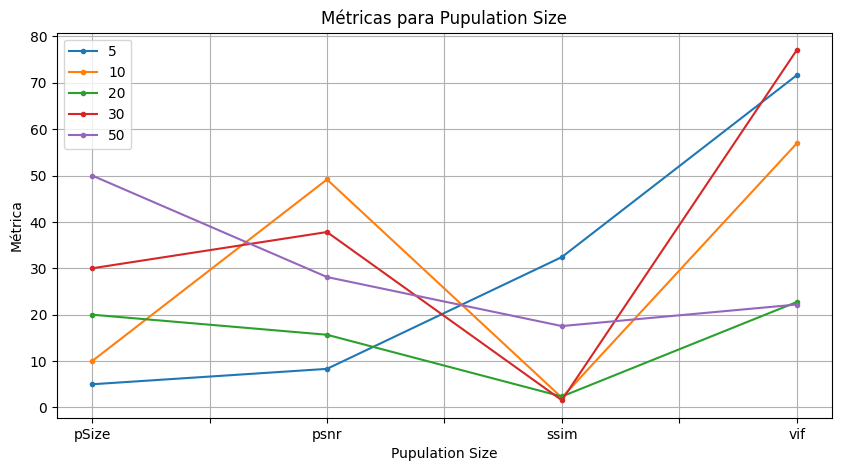

In [318]:
# plotar o gráfico
df_2.plot(figsize=(10, 5), grid=True, style='.-')
plt.xlabel('Pupulation Size')
plt.ylabel('Métrica')
plt.title('Métricas para Pupulation Size')
plt.show()

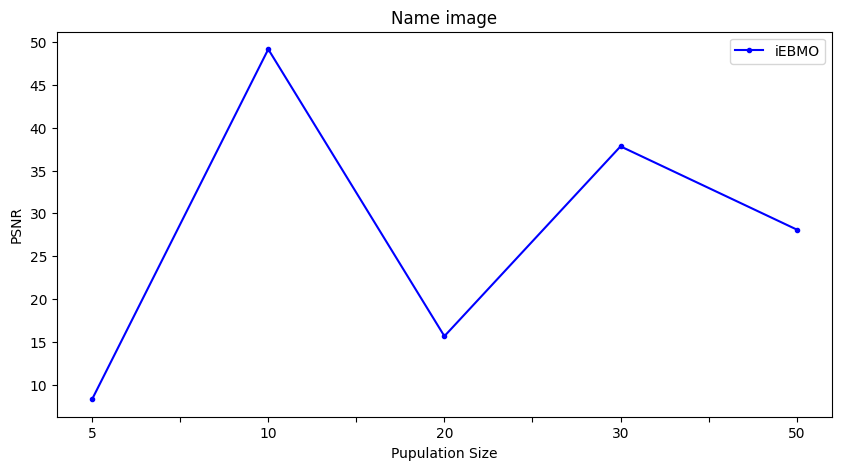

In [319]:
# plotar o gráfico somente do PSNR

df_2.loc['psnr'].plot(figsize=(10, 5), style='.-', color='blue')
plt.xlabel('Pupulation Size')
plt.ylabel('PSNR')
plt.title('Name image')
plt.legend(['iEBMO'])
plt.show()

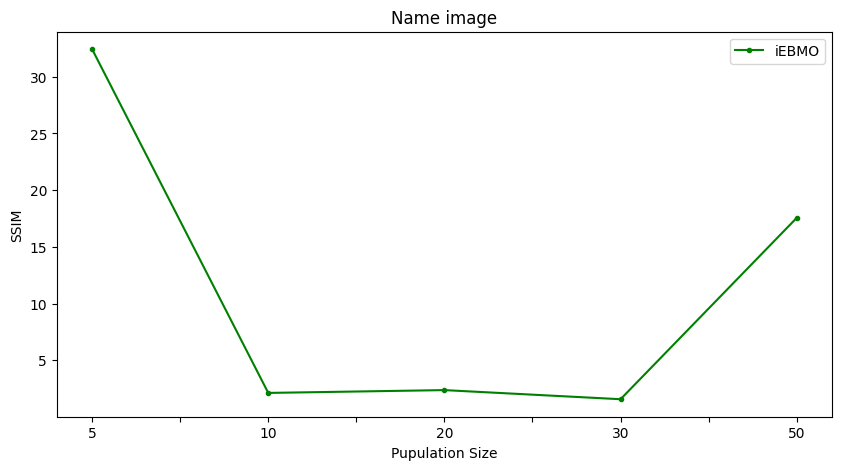

In [320]:
# plotar grafico somente do SSIM
# plotar o gráfico somente do PSNR

df_2.loc['ssim'].plot(figsize=(10, 5), style='.-', color='green')
plt.xlabel('Pupulation Size')
plt.ylabel('SSIM')
plt.title('Name image')
plt.legend(['iEBMO'])
plt.show()

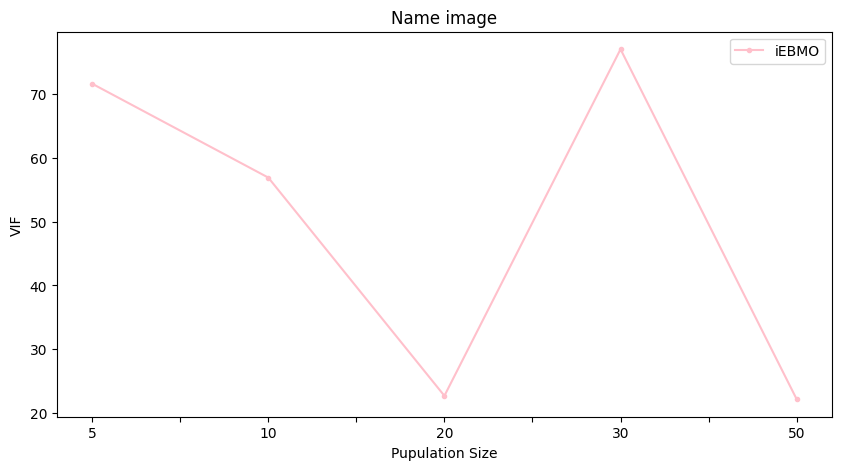

In [321]:
# plotar grafico somente do VIF
# plotar o gráfico somente do PSNR

df_2.loc['vif'].plot(figsize=(10, 5), style='.-', color='pink')
plt.xlabel('Pupulation Size')
plt.ylabel('VIF')
plt.title('Name image')
plt.legend(['iEBMO'])
plt.show()